<a href="https://colab.research.google.com/github/Munavvarh/CS-301-Intro-to-Data-Science-/blob/main/Assignment2_(CS301).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.stats as sstats
import csv
from datetime import datetime, date, time
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.feature_extraction import FeatureHasher
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.metrics import precision_recall_curve

In [ ]:
#here mounting my google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp /content/drive/MyDrive/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download avazu-ctr-prediction

100% 1.19G/1.19G [00:10<00:00, 110MB/s]
100% 1.19G/1.19G [00:10<00:00, 120MB/s]


In [ ]:
!unzip avazu-ctr-prediction.zip

Archive:  avazu-ctr-prediction.zip
  inflating: sampleSubmission.gz     
  inflating: test.gz                 
  inflating: train.gz                


In [ ]:
dataset = r'/content/train.gz' 
df = pd.read_csv(dataset,nrows=5000)          # reading 5000 rows dataset only to start with


In [ ]:
df.shape      #showing the shpae of the data that we read and stored in df. 

(5000, 24)

In [ ]:
df.columns        # showing all the columns that the dataset contains

Index(['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [ ]:
display(df)     # shwoing the first and last 5 elements of the data set that we read into the df.

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1000009418151094273,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,10000169349117863715,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,10000371904215119486,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,10000640724480838376,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,10000679056417042096,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,10702678919840709158,0,14102100,1005,0,85f751fd,c4e18dd6,50e219e0,a97b17d0,aefc06bd,...,1,0,1276,320,50,196,3,303,100075,15
4996,10703150479367170804,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
4997,1070330142137431328,1,14102100,1005,1,cffc1324,bc63ea42,335d28a8,ecad2386,7801e8d9,...,1,0,20596,320,50,2161,0,35,-1,157
4998,10703354687287883599,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15708,320,50,1722,0,35,-1,79


In [ ]:
df.info()            # here showing the types of the each columns in the dataset. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                5000 non-null   uint64
 1   click             5000 non-null   int64 
 2   hour              5000 non-null   int64 
 3   C1                5000 non-null   int64 
 4   banner_pos        5000 non-null   int64 
 5   site_id           5000 non-null   object
 6   site_domain       5000 non-null   object
 7   site_category     5000 non-null   object
 8   app_id            5000 non-null   object
 9   app_domain        5000 non-null   object
 10  app_category      5000 non-null   object
 11  device_id         5000 non-null   object
 12  device_ip         5000 non-null   object
 13  device_model      5000 non-null   object
 14  device_type       5000 non-null   int64 
 15  device_conn_type  5000 non-null   int64 
 16  C14               5000 non-null   int64 
 17  C15           

In [ ]:
# Now dropping unnecessary columns 

df = df.drop('id', axis=1)

In [ ]:
#showing that id colum has been dropped

df.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,2,15706,320,50,1722,0,35,-1,79
1,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
2,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15704,320,50,1722,0,35,100084,79
3,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,15706,320,50,1722,0,35,100084,79
4,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,07d7df22,...,1,0,18993,320,50,2161,0,35,-1,157


In [ ]:
df["click"].value_counts() / len(df)

0    0.8274
1    0.1726
Name: click, dtype: float64

In [ ]:
#The overall click through rate is approx. 17%, and approx. 83% is not clicked.

In [ ]:
# here I am dropping this columns that have data type as an 'object' to not cause my training model any issue. However, I can also convert those columns into int and that can also work.

df = df.drop('site_id', axis=1)
df = df.drop('site_domain', axis=1)
df = df.drop('site_category', axis=1)
df = df.drop('app_id', axis=1)
df = df.drop('app_domain', axis=1)
df = df.drop('app_category', axis=1)
df = df.drop('device_id', axis=1)
df = df.drop('device_ip', axis=1)
df = df.drop('device_model', axis=1)

In [ ]:
# here, I am showing that those columns are dropped
df.columns

Index(['click', 'hour', 'C1', 'banner_pos', 'device_type', 'device_conn_type',
       'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21'],
      dtype='object')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df, df['click'], test_size=0.2, random_state=100)       #setting up my train and test 

In [ ]:
logmodelVal = LogisticRegression()


In [ ]:
logmodelVal.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predictionsVal = logmodelVal.predict(x_test)

In [ ]:
print(classification_report(y_test,predictionsVal))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       827
           1       0.00      0.00      0.00       173

    accuracy                           0.83      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.68      0.83      0.75      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# above all the cassifiers have been train and tested using Logistic Regression and the best approx avg is 0.41 and accuracy is approx 0.83.

In [ ]:
"""
Now, below I am going to implement SGD 
to accomplish this online learning, we need to utilize the Stochastic Gradient Descent approach, with model changes 
performed for a single data sample at a time. SGDClassifier is one of several outstanding online learning algorithms available in Scikit-learn.
The time complexity of SGDClassifier increases linearly with training data size. Another benefit is that it has a 
constant memory usage, allowing it very flexible.

"""

'\nNow, below I am going to implement SGD \nto accomplish this online learning, we need to utilize the Stochastic Gradient Descent approach, with model changes \nperformed for a single data sample at a time. SGDClassifier is one of several outstanding online learning algorithms available in Scikit-learn.\nThe time complexity of SGDClassifier increases linearly with training data size. Another benefit is that it has a \nconstant memory usage, allowing it very flexible.\n\n'

In [ ]:
myFile = dataset 
chunkVal = 10000
trainVal = int(0.2*404280)
testVal = 404280 - trainVal
trainItr = round(trainVal/chunkVal)
testItr = round(testVal/chunkVal)
SGDmodel = SGDClassifier(loss='log',  alpha=.000001, penalty='l2', eta0=2.0, shuffle=True, n_jobs=-1,learning_rate='invscaling',  random_state=10)
partial_fit_classes = np.array([0, 1]) 

In [ ]:
hashVal = FeatureHasher(n_features=2**26, input_type='string')
preprocessor = Pipeline([('feature_hashing', hashVal)])

In [ ]:
columns = ['id', 'click', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category','device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
dfTrain = pd.read_csv(myFile, sep=',', chunksize=chunkVal, names=columns, header=0, nrows=trainVal)
dfTest = pd.read_csv(myFile, sep=',',chunksize=chunkVal, names=columns, header=0, skiprows=trainVal, nrows=testVal)

In [ ]:
def sgdData(df):
    yTrain = df['click'].values
    yTrain = np.asarray(yTrain).ravel()
    X = df.drop(['id', 'click'], axis=1)
    XTrain = preprocessor.fit_transform(np.asarray(X.astype(str)))
    return yTrain, XTrain

In [ ]:

countVal = 0
totalLogLoss = 0
for df in dfTrain:
    countVal += 1
    yTrain, XTrain = sgdData(df)
    SGDmodel.partial_fit(XTrain, yTrain, classes=partial_fit_classes)

totalLogLoss = 0
countVal = 0
for df in dfTest:
    countVal += 1
    y_test, X_test = sgdData(df)
    y_pred = SGDmodel.predict_proba(X_test)
    log_loss_temp = log_loss(y_test, y_pred)
    totalLogLoss += log_loss_temp

print("Final log loss: ", totalLogLoss/countVal)



Final log loss:  0.4090866178333795


In [ ]:
#Plot the precision vs recall curve of your classifier. Clearly explain the tradeoff between the two quantities and the shape of the curve.

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

In [ ]:
df = pd.read_csv(dataset, nrows=10000)

In [ ]:
def myData():
    myFile = df.copy()            
    targetVal = df['click']
    counterVal = 0
    listVal = []
    for x in targetVal:
        if counterVal >= 7900:
                break
        if x == 0:
            listVal.append(counterVal)
        
        counterVal += 1
       
    myFile.drop(myFile.index[listVal], inplace=True)
    print(counterVal)
    return myFile

In [ ]:
myFile = myData()

7900


In [ ]:
targetVal = myFile['click']
dataVal = myFile.drop(df.columns[[0, 1]], axis=1)
dataVal = pd.get_dummies(dataVal)
XTrain, XTest, yTrain, yTest = train_test_split(dataVal, targetVal, stratify=targetVal, random_state=0)

In [ ]:
pramGridVal = {'randomforestclassifier__n_estimators': [50, 100],'randomforestclassifier__max_depth': [10, 50, 100]}
pipeVal = make_pipeline(RandomForestClassifier())
gridVal = GridSearchCV(pipeVal, pramGridVal, cv=5)
gridVal.fit(XTrain, yTrain)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [10, 50, 100],
                         'randomforestclassifier__n_estimators': [50, 100]})

[]

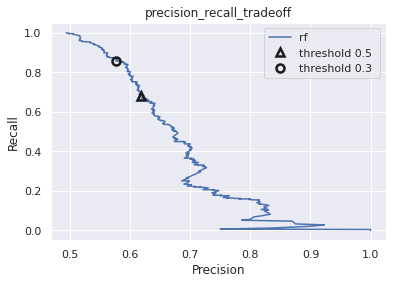

In [ ]:
precisionVal, recallVal, probaVal = precision_recall_curve(yTest, gridVal.predict_proba(XTest)[:, 1]) 
plt.plot(precisionVal, recallVal, label="rf")
closedfVal = np.argmin(np.abs(probaVal - 0.5))
plt.plot(precisionVal[closedfVal], recallVal[closedfVal], '^', markersize=8, label="threshold 0.5 ", fillstyle="none", c='k', mew=2.5)
closedfVal = np.argmin(np.abs(probaVal - 0.3))
plt.plot(precisionVal[closedfVal], recallVal[closedfVal], 'o', markersize=8, label="threshold 0.3 ", fillstyle="none", c='k', mew=2.5)
plt.xlabel('Precision')
plt.ylabel("Recall")
plt.legend(loc="best")
plt.title("precision_recall_tradeoff")
plt.plot()

In [ ]:
"""
In conclusion, the concept behind the precision-recall trade-off is that 
the weights will tip when we adjusts the threshold for classifying something as positive or negative.
That means that either precision will rise while recall falls, or the opposite will occur.
"""


'\nIn conclusion, the concept behind the precision-recall trade-off is that \nthe weights will tip when we\xa0adjusts the threshold for classifying something as positive or negative.\nThat means that either precision will rise while recall falls, or the opposite will occur.\n'